# HW 4

* Due on **INSERT DUE DATE**
* Please comment your code and upload the Jupyter notebook file to the dropbox link given in Moodle
* Q&A: Teams or Email (binzh@hku.hk), Katie (u3007888@connect.hku.hk), Fenn (fleppard@connect.hku.hk)

### 1. Airline Routes (20%)
* Create a map of the world using **Cartopy** with the **PlateCarree** projection.
* Add longitude and latitude grid lines to your map
* Fill your map with colours (of your choice) using the **feature** attribute of cartopy
* Draw country borders, and label three countries "United States", "Argentina", and "China" using the plt.text() function.
* Mark Hong Kong, Buenos Aires and Los Angeles on your map and label them.
* Draw 2 great cirlces, one connecting Hong Kong to Los Angeles, and one connecting Hong Kong to Buenos Aires.
* Calculate the distance between Hong Kong and Buenos Aires/Los Angeles using the great_circle() function given below.
* Annotate the distance on both of your plotted great circles.

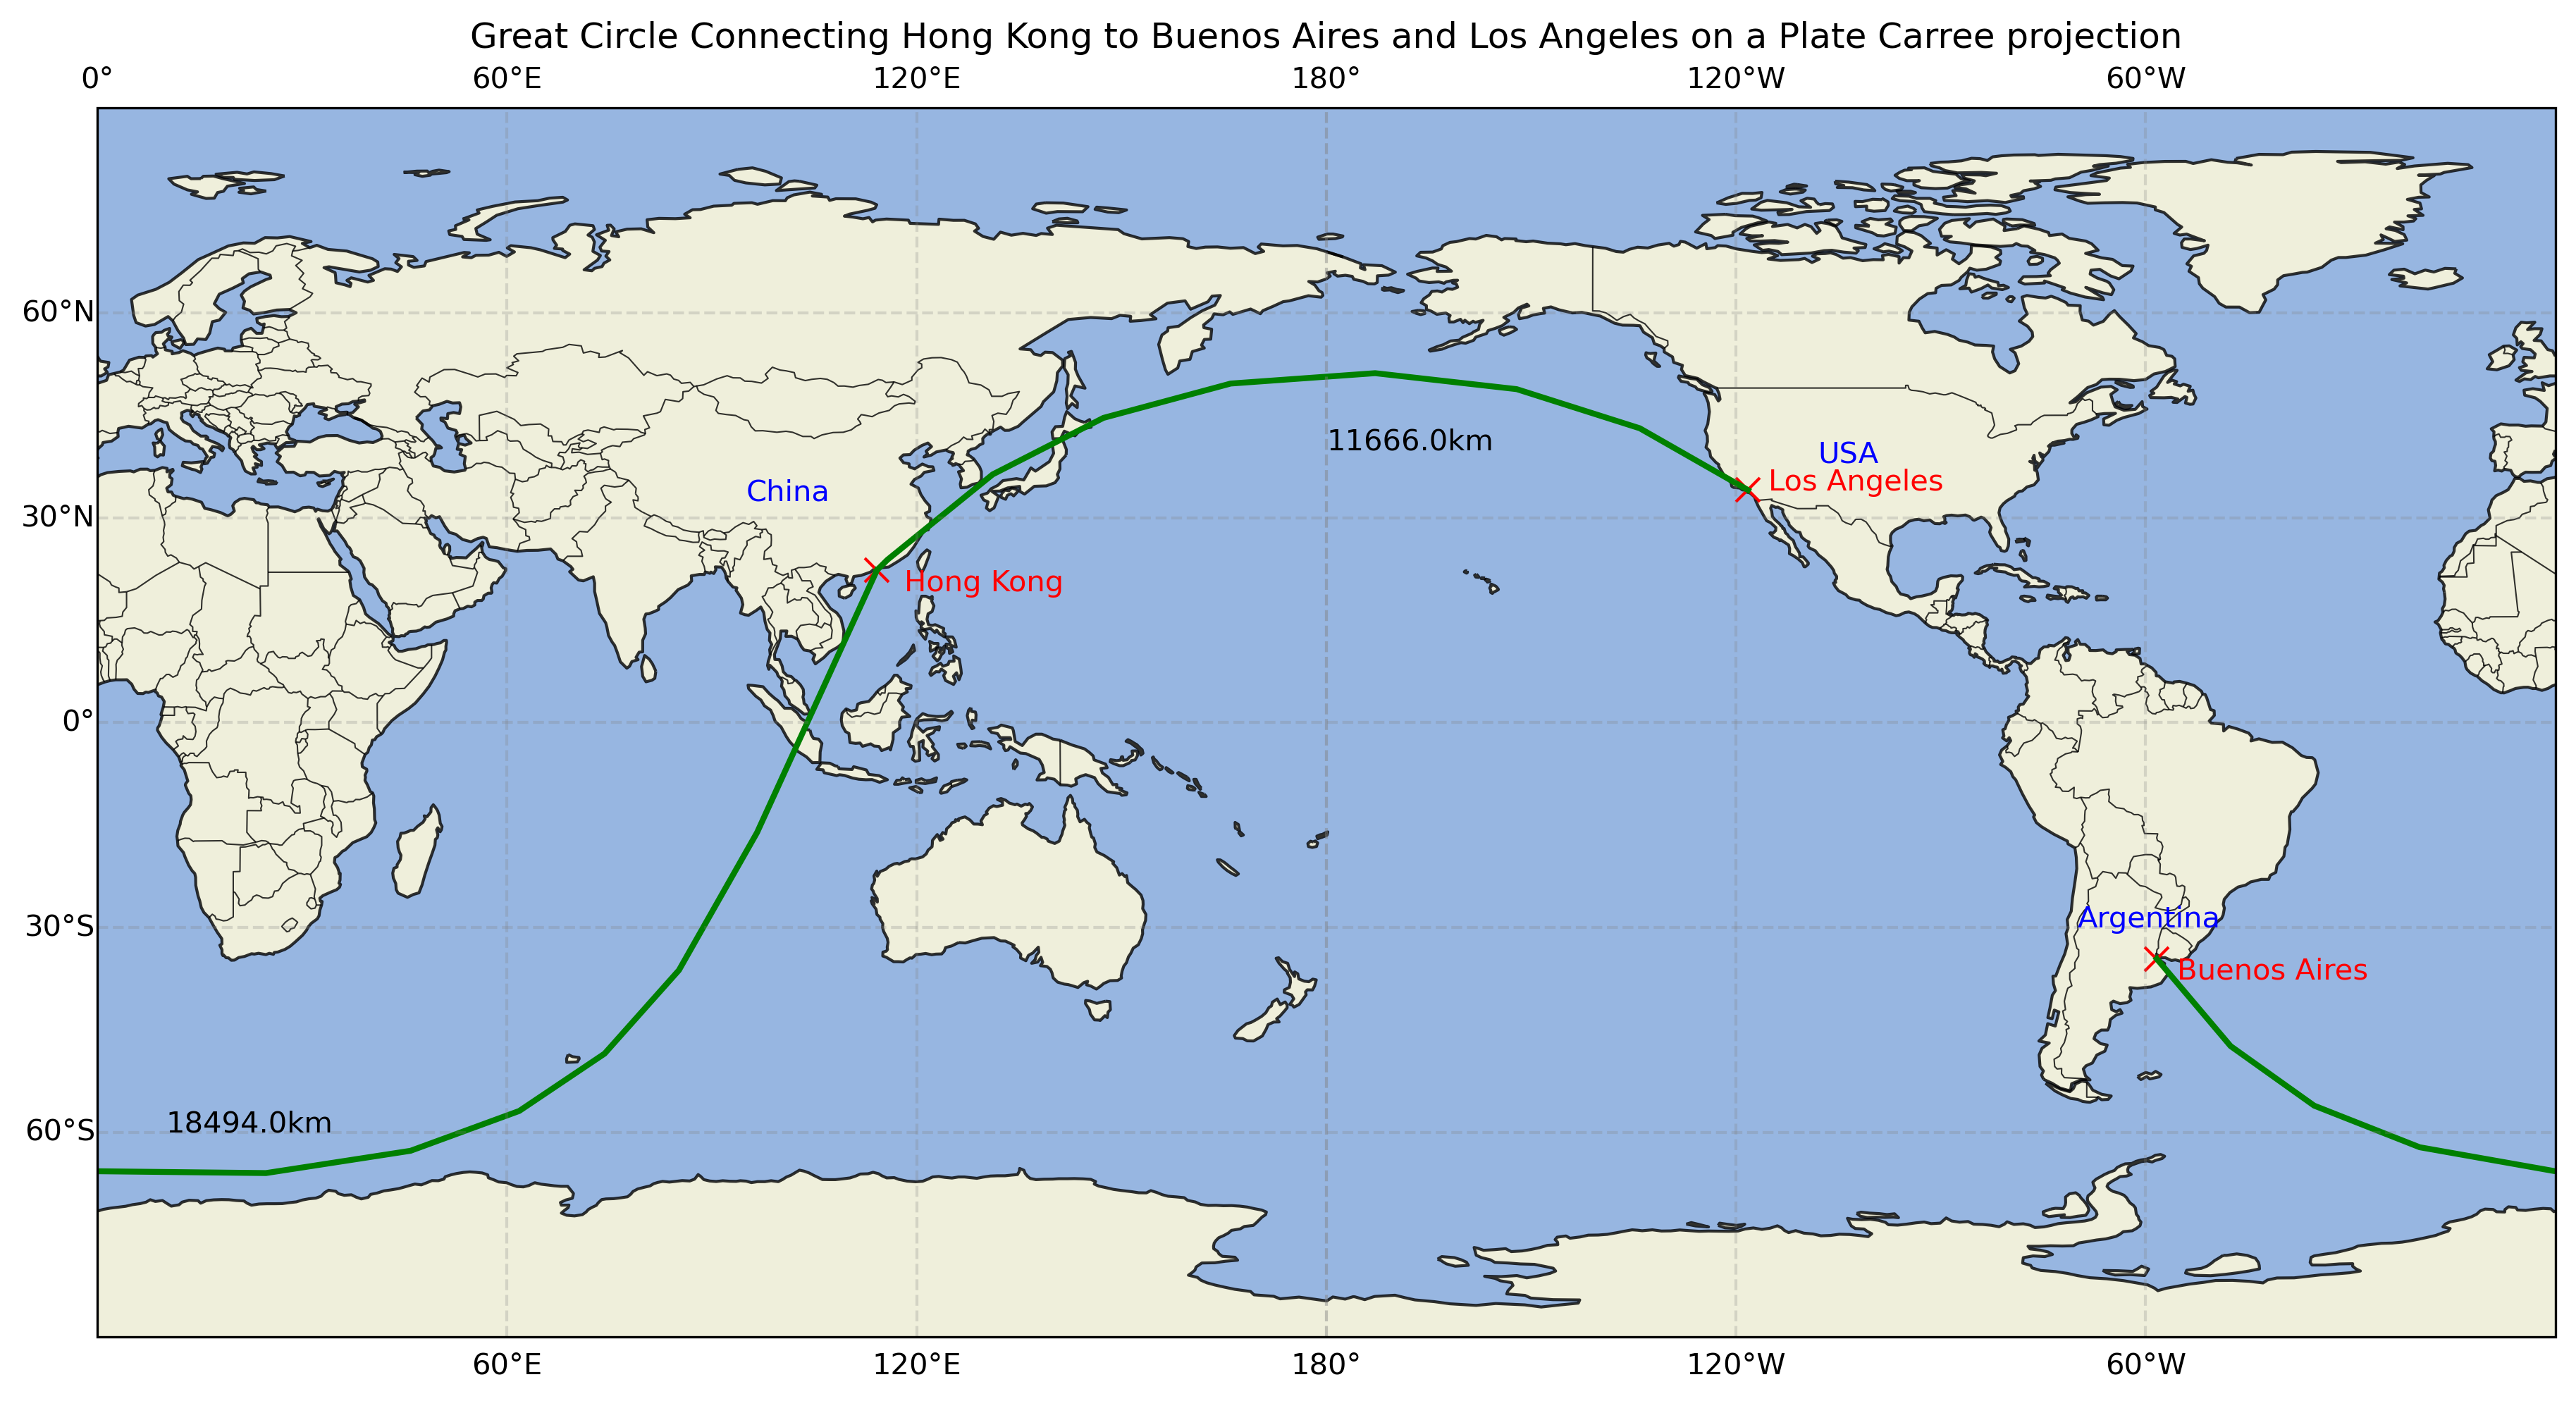

In [4]:
import numpy as np # import numpy
import matplotlib.pyplot as plt # import pyplot
import cartopy.crs as ccrs # the cartopy module for making maps
import cartopy.feature as cfeature # map features attribute

import warnings 
warnings.filterwarnings("ignore") # ignore warning messages (optional)

def great_circle(lat_1,lon_1,lat_2,lon_2):
    """
    This code calculates the distance between two spatial points on the Earth
    INPUT: Point #1 (lat_1, lon_1) and Point #2 (lat_2, lon_2) in degrees
    OUTPUT: Distance in km
    Algorithm: Simple 3-D geometry calculation assuming the Earth is a perfect sphere
    """
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2=90.-lat_1,90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=lon_2-lon_1
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),np.radians(colat_2),np.radians(alpha)# continued line from above
    # from spherical trig we know that:
    cosa=np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha)
    # solve for a
    a=np.arccos(cosa)# take the arc cosine of cosa
    # remember to convert back to degrees!  
    distance = a*6380 # distance in km
    return distance

##### Start of Answer #####

fig = plt.figure(figsize=(15, 10.5), dpi=300)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
plt.plot(114.1694,22.3193, marker="x", c="Red", markersize=8,transform=ccrs.PlateCarree())
plt.text(118.1694, 19.3193, "Hong Kong", c="Red",transform=ccrs.PlateCarree())
plt.plot(-58.3816,-34.6037, marker="x", c="Red", markersize=8,transform=ccrs.PlateCarree())
plt.text(-55.3816, -37.6037, "Buenos Aires", c="Red",transform=ccrs.PlateCarree())
plt.plot(-118.2426,34.0549, marker="x", c="Red", markersize=8,transform=ccrs.PlateCarree())
plt.text(-115.2426, 34.0549, "Los Angeles", c="Red",transform=ccrs.PlateCarree())
ax.set_title("Great Circle Connecting Hong Kong to Buenos Aires and Los Angeles on a Plate Carree projection");
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.coastlines(alpha=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black', alpha=0.8)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.25, linestyle='--')
plt.text(95,32.5,"China", c="b",transform=ccrs.PlateCarree())
plt.text(-108,38,"USA", c="b",transform=ccrs.PlateCarree())
plt.text(-70,-30, "Argentina", c="b", transform=ccrs.PlateCarree())
plt.plot([-58.3816,114.1694],[-34.6037,22.3193],c="Green",transform=ccrs.Geodetic(), linewidth=2)
plt.plot([-118.2426,114.1694],[34.0549,22.3193],c="Green",transform=ccrs.Geodetic(), linewidth=2)
plt.text(-180, 40, str(np.round(great_circle(34.0549,-118.2426,22.3139,114.1694))) + "km", c="k",transform=ccrs.Geodetic())
plt.text(10, -60, str(np.round(great_circle(-34.6037,-58.3816,22.3139,114.1694))) + "km", c="k",transform=ccrs.Geodetic())
ax.set_global()
plt.show()

### 2. Recent Volcanic Eruptions (20%)

* Download the data file "recent_eruptions.txt" and save it to your current directory where your .ipynb file is. This file contains information about all confirmed volcanic eruptions fron Jan 1st 2020 til Dec 31st 2022.
* Load the data into python as stings using numpy **genfromtxt()**, the values are separated using Tab so you need to specify the delimiter as **"\t"** and skip the first row using **skip_header=1** as this row contains the column headers. 
* Each row represents one eruption; the column data goes as "Volcano Number", "Volcano Name", "Eruption Year", "Eruption Month", "Latitude", "Longitude", "VEI".
* **Produce a histogram** showing the distribution of earthquakes' VEI (Volcanic Explosivity Index). The higher the VEI the more explosive the eruption is. https://en.wikipedia.org/wiki/Volcanic_explosivity_index
* Make a global map centered on the pacific ocean using **Cartopy with the PlateCarree projection**. colour the continents "grey" (i.e., use color = 'grey') and set the alpha kewward equals to 0.2 (i.e., alpha = 0.2 in the ax.add_feature() function)
* Show the locations of volcanic eruptions on a global mapusing a global scale projection (your choice) using a scatter (or bubble) plot.
* Set the size of the bubbles based on how recent the eruption is. The most recent eruptions should be large and the oldest the smallest.
* Set the colour of the eruptions based on their VEI with the following rule: Black (VEI = 5), Red (VEI = 4), Orange (VEI = 3), Yellow (VEI = 2), Green (VEI = 1) and Blue (VEI = 0).
* Label your figure properly and include a legend (ie. use the plt.legend() function).

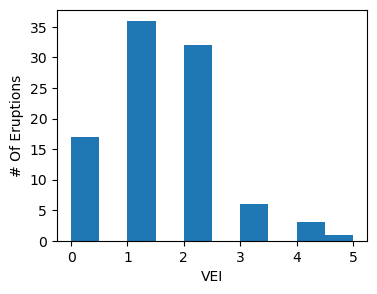

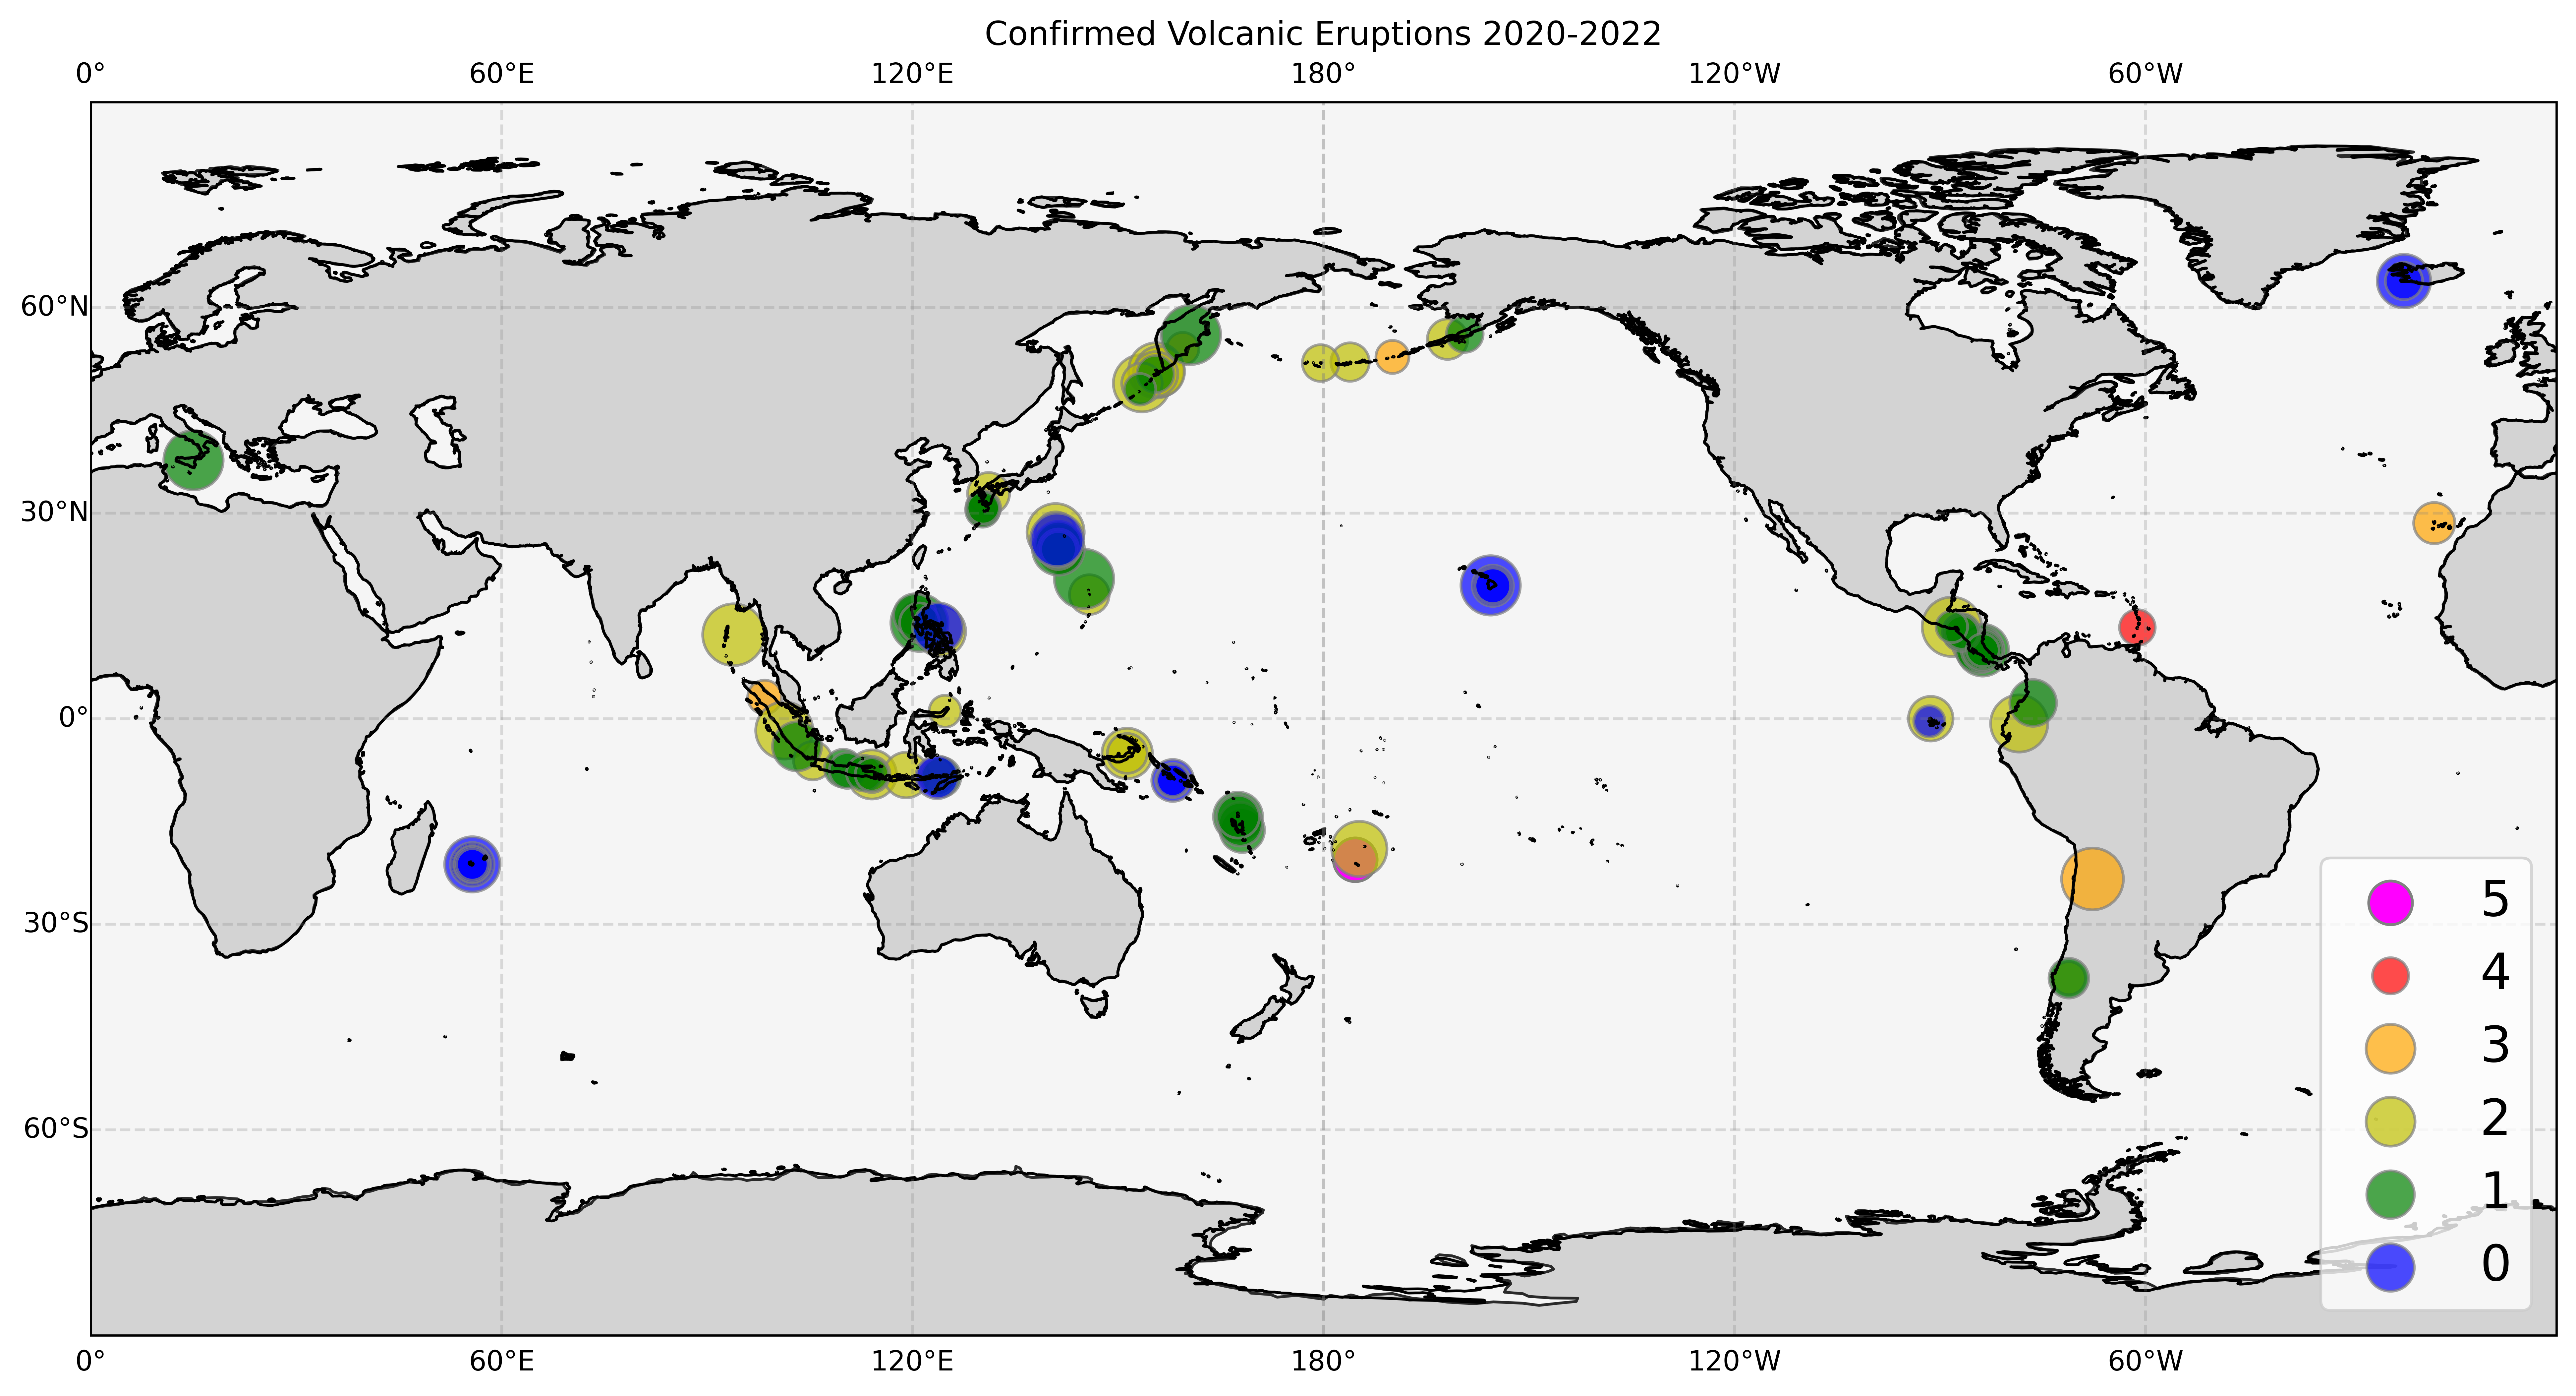

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

volc_data = np.genfromtxt("recent_eruptions.txt", delimiter="\t", skip_header=1, dtype=str)

lon = volc_data[:,5].astype(float)
lat = volc_data[:,4].astype(float)
vei = volc_data[:,6].astype(float)
name = volc_data[:,1].astype(str)
year = volc_data[:,2].astype(float)
month = volc_data[:,3].astype(float)

age = 1/(2024-(year+month/12))

plt.figure(dpi=100, figsize=(4,3))
plt.hist(vei)
plt.ylabel("# Of Eruptions"), plt.xlabel("VEI")
plt.show()

plt.figure(figsize=(16,11), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.OCEAN, color="whitesmoke")
ax.add_feature(cfeature.LAND, color="lightgray")
ax.coastlines(alpha=0.8)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.25, linestyle='--')
ax.coastlines(resolution='50m')

plt.scatter(lon[vei==5], lat[vei==5], age[vei==5]*500, c="magenta", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=1, label="5")
plt.scatter(lon[vei==4], lat[vei==4], age[vei==4]*500, c="r", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=0.7, label="4")
plt.scatter(lon[vei==3], lat[vei==3], age[vei==3]*500, c="orange", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=0.7, label="3")
plt.scatter(lon[vei==2], lat[vei==2], age[vei==2]*500, c="y", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=0.7, label="2")
plt.scatter(lon[vei==1], lat[vei==1], age[vei==1]*500, c="g", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=0.7, label="1")
plt.scatter(lon[vei==0], lat[vei==0], age[vei==0]*500, c="b", transform=ccrs.PlateCarree(), edgecolor="grey", alpha=0.7, label="0")
plt.legend(loc=4, fontsize=18, prop={"size": 18})
plt.title("Confirmed Volcanic Eruptions 2020-2022")
ax.set_global()
plt.show()

### Monthly Rainfall in China (30%)

* import the **cartopy.io.shapereader** package
* download the folder "China Data", this folder contains many files which describe the shapes of the regions in China.
* create a variable and use the list() function to make a list from the downloaded data. Use the shapereader.Reader("filepath").geometries() in the list function.
* For the file path, start with the file called **gadm41_CHN_1.shp**.

* Create a cartopy plot with a coastline resolution of 50m on a projection of your choice. Limit the plot using set_extent() to only show china and plot the variable you previously created.
* You should produce a plot with the regional borders shown only in China. Try changing the number at the end of the .shp file (0,1,2,3) to see the different plots you can create.

Plotting the monthly rainfall for July 2017:

* Next download the china_rainfall.txt file and import it using genfromtxt() fron numpy. The delimiter in this data is tab ("\t") and skip the header using skip_header=1.
* This data has 4 columns: Region Name, Monthly Rainfall, Longitude, Latitude.
* Produce a bubble plot with a bubble whos size corresponds to the amount of rainfall and is positioned over each region using the corresponding longitudes and latitudes.
* Make sure your plot is well presented, has lon and lat gridlines and a title.

* Find out which regions had the highest and lowest rainfalls in July 2017 and print the results (HINT: use np.where() to find the index of the region with the highets/lowest rainfall)

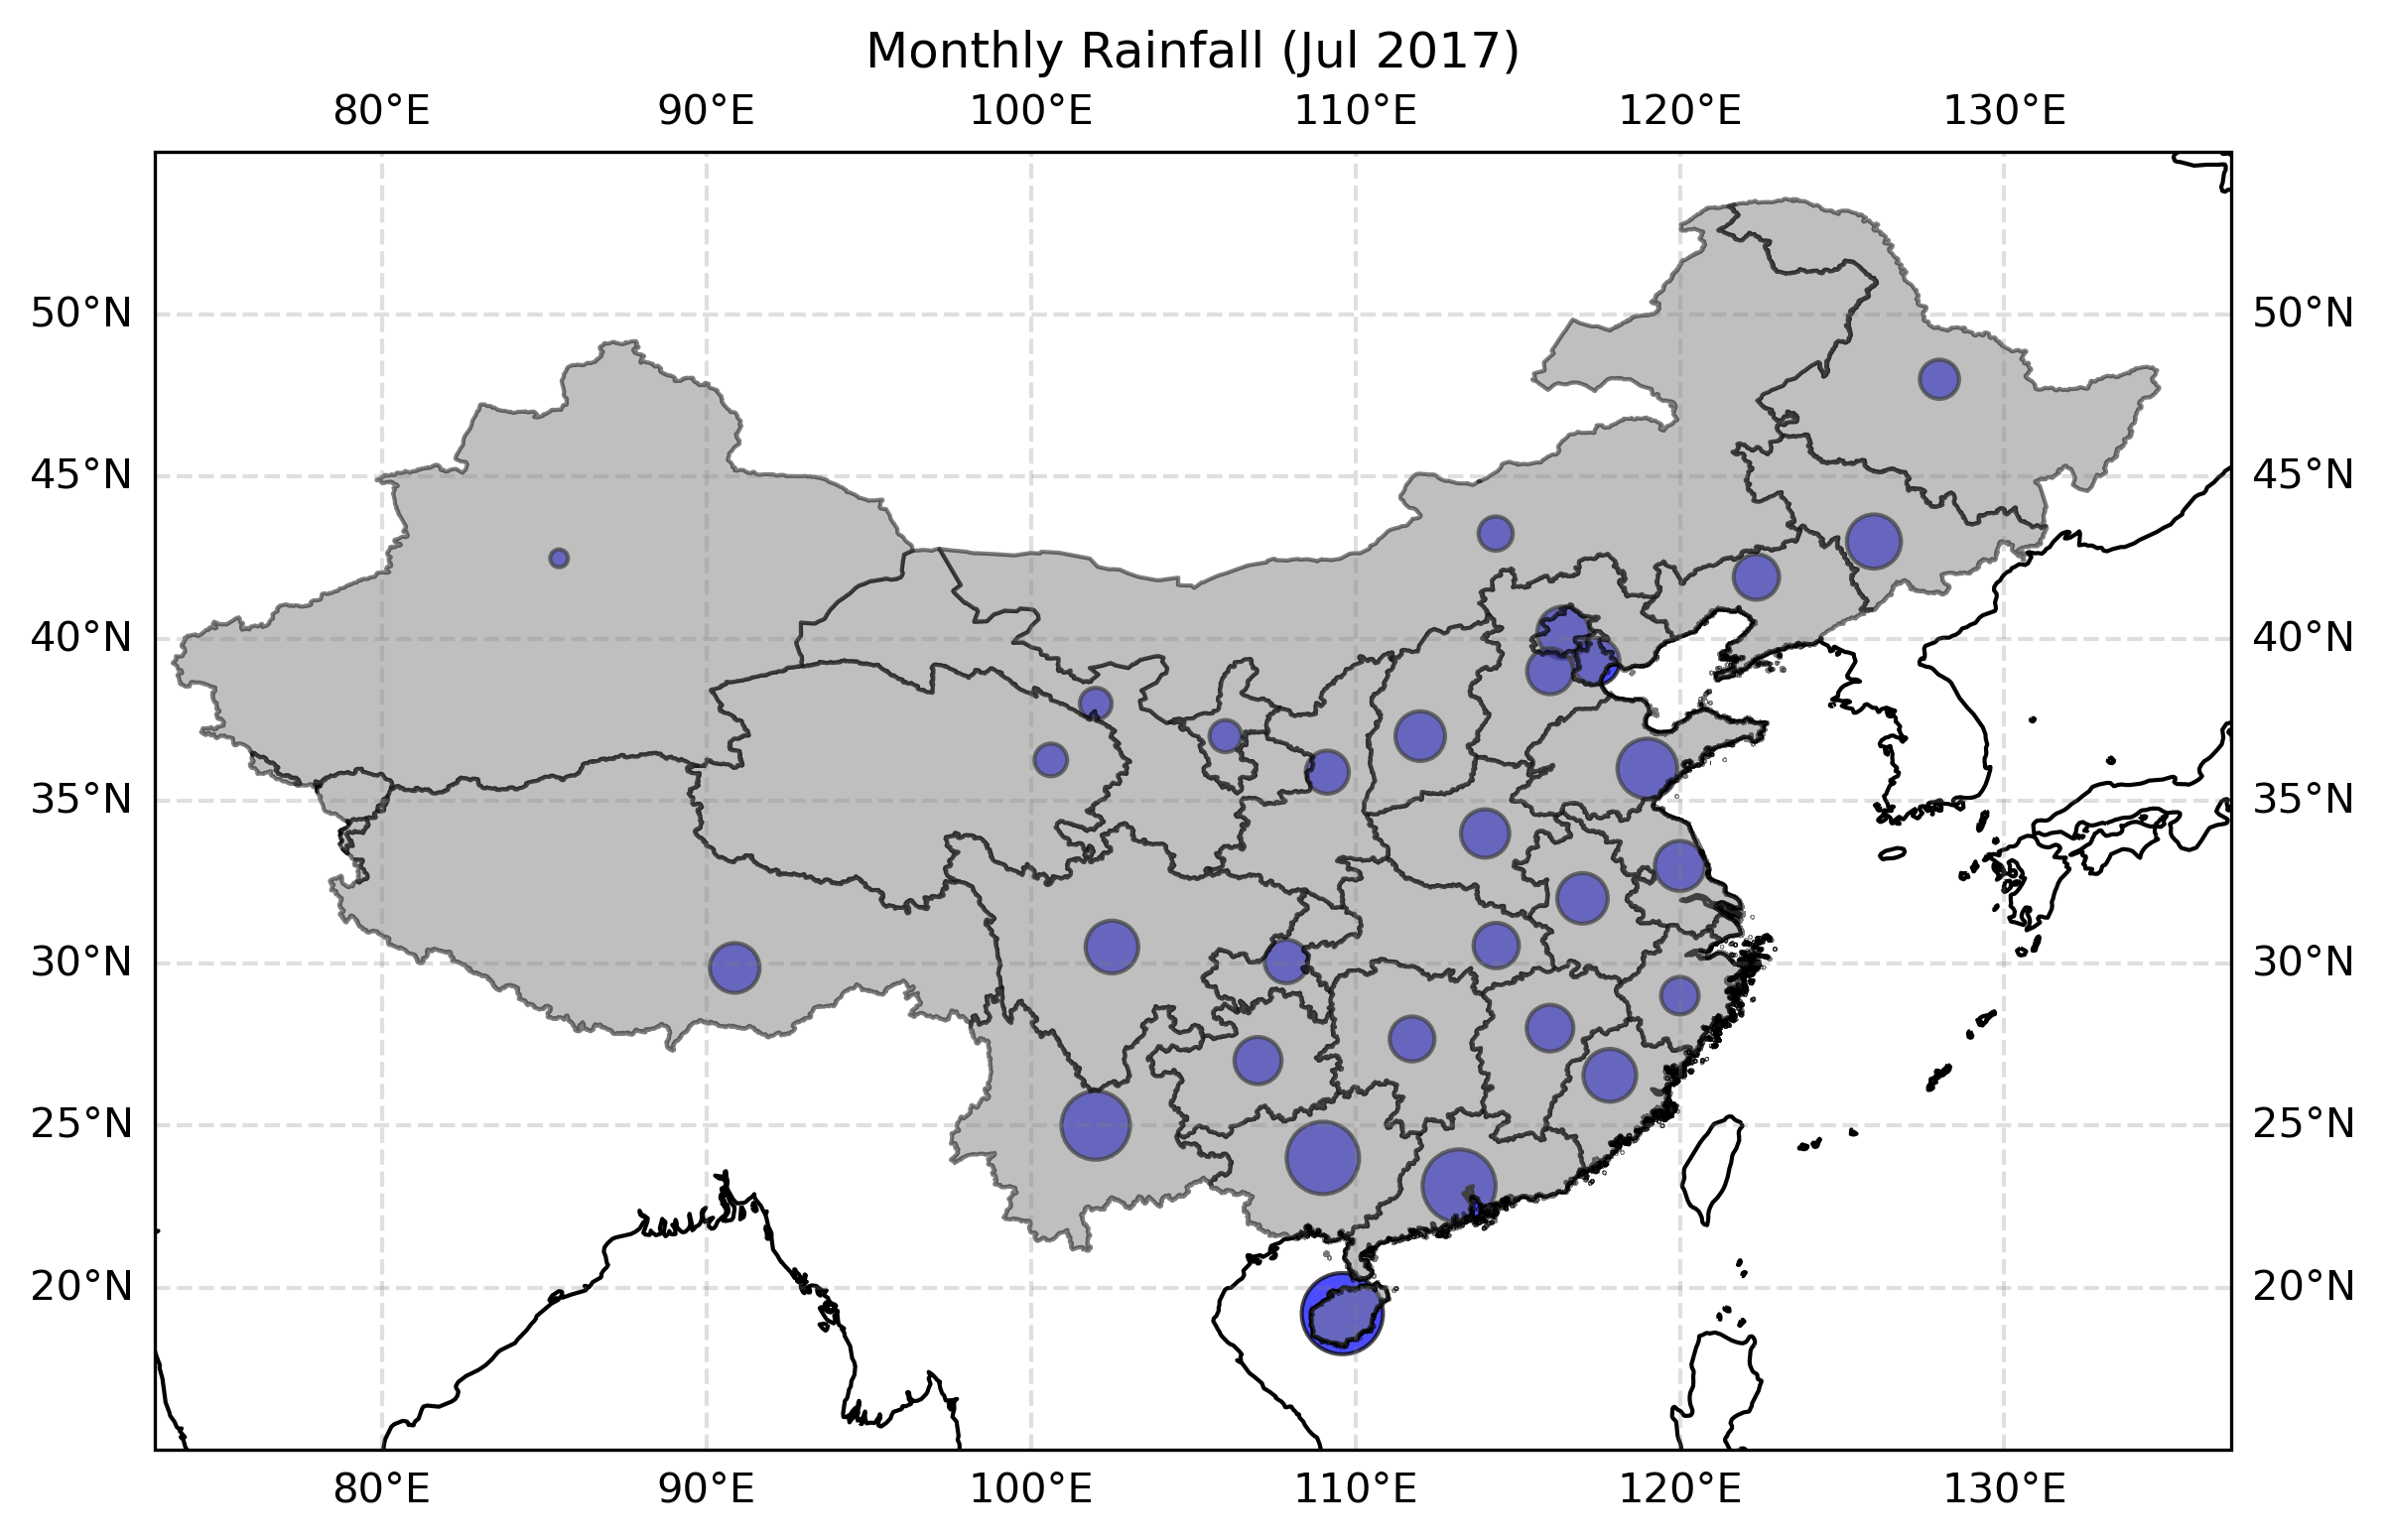

The region with the highest rainfall is ['Hainan'] with a rainfall of  384.9 mm
The region with the lowest rainfall is ['Xinjiang'] with a rainfall of  18.6 mm


In [8]:
import cartopy.io.shapereader as shpreader
import numpy as np


fig=plt.figure(figsize=(9,8), dpi=300)

fname = "./China Data/gadm41_CHN_1.shp"
adm1_shapes = list(shpreader.Reader(fname).geometries())
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title("Monthly Rainfall (Jul 2017)")
ax.coastlines(resolution="50m")
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.5)
ax.set_extent([73,137,15,55], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.25, linestyle='--')

rain_data = np.genfromtxt("china_rainfall.txt", delimiter="\t", dtype=str, skip_header=1)

lon = rain_data[:,2].astype(float)
lat = rain_data[:,3].astype(float)
rain = rain_data[:,1].astype(float)
names = rain_data[:,0].astype(str)

plt.scatter(lon,lat, s=rain, c="b", alpha=0.7, edgecolor="k")

plt.show()

max_index = np.where(rain == np.max(rain))
min_index = np.where(rain == np.min(rain))

print("The region with the highest rainfall is", names[max_index], "with a rainfall of ", np.max(rain), "mm")
print("The region with the lowest rainfall is", names[min_index], "with a rainfall of ", np.min(rain), "mm")

### 4. Typhoon Mangkhut (30%)

* Download the data file "mangkhut.txt" to your current folder
* Load the data file into Python using: the genfromtxt() function, using "\t"(Tab) as the delimiter, and skip the first row (headers)
* The column data goes as "year" "month" "day" "hour" "latitude" "longitude" "pressure" "wind speed" "class"
* Plot both the pressure and wind speed as a function of **the lifetime** of the Typhoon (e.g., in hours) in the same figure, with two different y-axis. (Hint: use the "day" and "hour" information to construct a new array called "lifetime", which is basically the age of the Typhoon in hours)
* Visualize the relationship between wind speed and pressure using a scatter plot. What do you get? Can you explain it?
* Make a bubble plot to show the track of Hurrican Mangkhut, set the size of your bubbles to be the class of the Typhoon (you may need to scale it) and the color of the bubbles based on the speed of the Typhoon follow the rules: Red (speed>=100), Orange (60<=speed<100), Yellow (30<=speed<60), Green (otherwise)
* Put on a local map with country boundaries (you may use the '50m' resolution in the .coastline() function) together with your Typhoon track, choose appropriate map boundaries to make sure the track of Mangkhut is highlighted in the center of your map. 
* What happened to the wind speed near the Luzon islands?
* Calculate the **total distance** (in km) that Typhoon Mangkhut traveled and estimate the **average speed** of the center of the typhoon (Hint: break the Typhoon track into pieces and sum over all the great-circle distance, use the function given in Prob. 1)

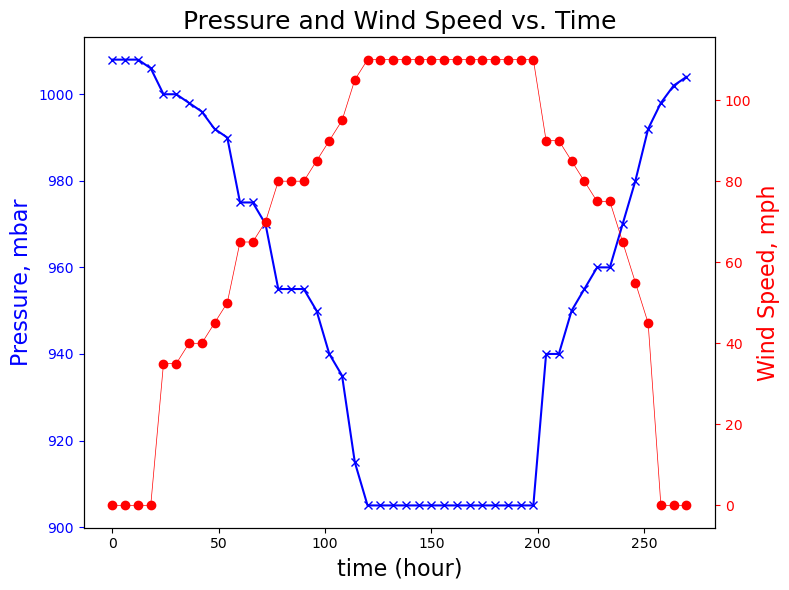

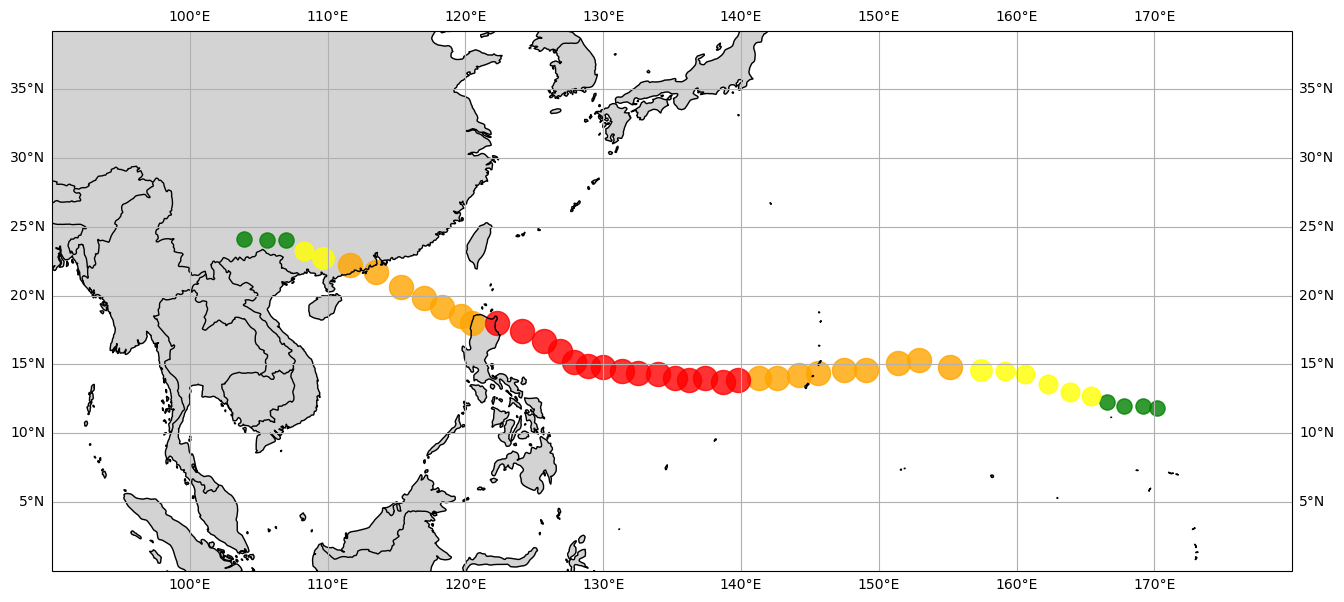

the total distance of Manghkut is 7506.43 km (for-loop method).
the total distance of Mangkhut is 7506.43 km (np array method).
the average speed of Mangkhut is 27.8 mph


In [9]:
# load the mangkhut.txt data, note that the data file "mangkhut.txt" must be in the same folder as your ipynb file, 
# unless you specify a location for the file so Python knows where to look for the data file
data = np.genfromtxt('mangkhut.txt',dtype=float, delimiter='\t',skip_header=1)

# index slicing
day  = data[:,2] # column 3 is day
hour = data[:,3] # column 4 is hour
lat  = data[:,4] # column 5 is latitude
lon  = data[:,5] # column 6 is longitude
pres = data[:,6] # column 7 is pressure
speed = data[:,7] # column 8 is wind speed
grade = data[:,8] # column 9 is class of the typhoon

# calculate the life time of the Typhoon in hours
lifetime = (day - day[0])*24 + (hour - hour[0]) # by removing day[0] and hour[0], the starting time is exactly 0
                                                # i.e., lifetime[0] = 0, typhoon started at t = 0 (hours)

# now plot the pressure and wind speed as functions of lifetime of the Typhoon
fig, ax1 = plt.subplots(figsize=(8, 6))

# plot the first x-y axis
ax1.plot(lifetime, pres, 'bx-')
ax1.set_xlabel('time (hour)',fontsize=16)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Pressure, mbar', color='b',fontsize=16)
ax1.tick_params('y', colors='b')

# plot the second x-y axis
ax2 = ax1.twinx()
ax2.plot(lifetime, speed, 'ro-',linewidth=0.5)
ax2.set_ylabel('Wind Speed, mph', color='r',fontsize=16)
ax2.tick_params('y', colors='r')
ax2.set_title('Pressure and Wind Speed vs. Time',fontsize=18)

fig.tight_layout()
plt.show()

plt.figure(figsize=(16,12)) # create a figure with a size of (20,15)
ax = plt.axes(projection=ccrs.PlateCarree()) # create a map project of PlateCarree
ax.coastlines(resolution='50m') # plot coastlines using the median-resolution coaseline data (110,50,10)
ax.gridlines(draw_labels = True, xlocs=range(90,181,10),ylocs=range(0,40,5)) # add lat-lon grid lines
extent = [90, 180, 0, 30] # set the extension of the map: [lon_left, lon_right, lat_low, lat_high]
ax.set_extent(extent) 

ax.add_feature(cfeature.BORDERS) # add country borders
ax.add_feature(cfeature.LAND,color='lightgrey', edgecolor='black') # add land color, with black lines

# now plot the track of Mangkhut on the map, scale the bubbles with the class of the typhoon and color with speed
# I'm using a nested for loop to step through all the data points in lat, lon
# the interator is i, lon[i], lat[i], gives you a particular point with information speed[i] and grade[i]
for i in range(0,lat.size): # i is from 0 to lat.size-1    
        
    if speed[i]>=100: # this if loop determines which color to use for each bubble, based on speed[i]
        c = 'red'
    elif speed[i]>=60:
        c = 'orange'
    elif speed[i]>=30:
        c = 'yellow'
    else:
        c = 'green'   
        
    plt.scatter(lon[i],lat[i],s=grade[i]*60,color=c,alpha=0.8,transform=ccrs.PlateCarree()) 
                                                     # now do a bubble plot with color:
                                                     # location is (x,y) in the geographic coordinates;
                                                     # size of bubble is grade[i]*60, scaled to make it visible
                                                     # color is c, which is selected based on the speed[i]
plt.show()

# now calculate the total distance and average speed of the typhoon Mangkhut
# the idea is to start from the first track point, use the great_circle() function to compute the distance between
# adjacent track points, e.g., (lat[0],lon[0]) and (lat[1],lon[1]) is the distance between the first two track points;
# then sum over all the all the distances to get the total travel distance

# Method 1 to calculate the total travel distance: use a for loop
total_distance = 0.0
for i in range(0,lat.size-1): 
    distance = great_circle(lon[i],lat[i],lon[i+1],lat[i+1]) # calculate the a small piece of distance between i & i+1
    total_distance = total_distance + distance # sum the small pieces of great circles together
    
print('the total distance of Manghkut is', np.round(total_distance,2),'km (for-loop method).') # the np.round(*,2) 
                                                                                   # function here takee two digits

# Method 2 to calculate the total travel distance: numpy array method (more advanced) - why can i do that?
distance = great_circle(lon[:-1],lat[:-1],lon[1:],lat[1:]) 
total_distance = np.sum(distance)
print('the total distance of Mangkhut is', np.round(total_distance,2),'km (np array method).') 

# now the average speed is estimated as "total distance" divided by "life time"
# note that lifetime[-1] - lifetime[0] is basically the total time of the typhoon
average_speed = total_distance/(lifetime[-1] - lifetime[0])
print('the average speed of Mangkhut is', np.round(average_speed,2),'mph') 

### [Extra Credit] Atalantic Hurricanes in 2021 (30%)

* This problem requires additional thinking/skills, since you're going to process multiple files of all the Atalantic hurricanes in 2020 (31 .csv files in this case);
* Download the data folder "AL2020" from Moodle and save to your current folder (put in in the same directory as your jupyter notebook file); Each csv file contains the track information of a hurricane, including:
    - 'Name','Year_','Month', 'Day', 'date_time','Latitude', 'Longitude', 'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars'
    - the seperator is tab (\t)
* Try the following analysis (10% each):
    1. Plot all the Atalantic Hurricane tracks in a map projection (your choice)
    2. Use all the hurricane track data, plot the relationship between maximum wind speed and minimum pressure, what do you find?
    3. Which hurricane traveled the most in terms of total distance during its lifetime? (you may consider using the code you've developed in Prob. 5)

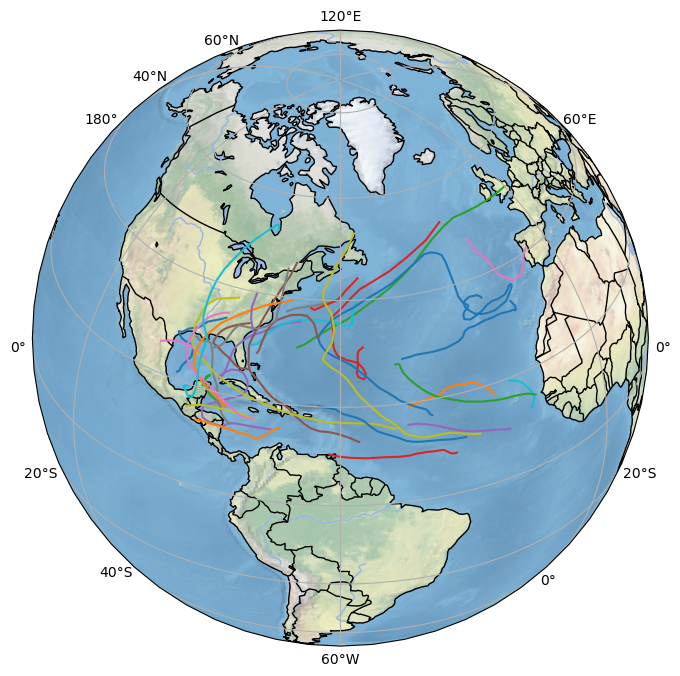

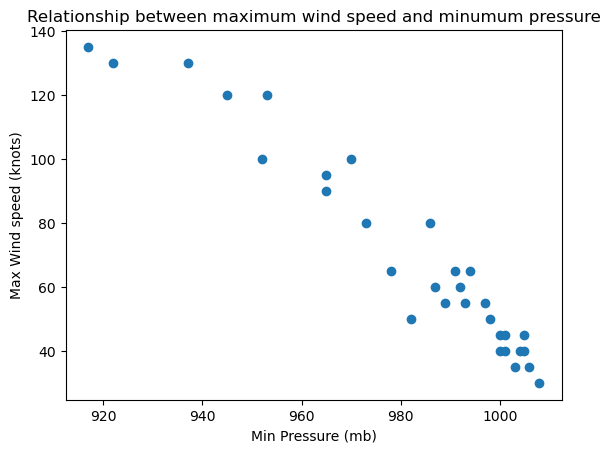

the hurricane with the longest traveling distance is Hurricane PAULETTE


In [11]:
def Hurricane_distance(lat,lon):
    """
    doc str - i'm too lazy now - this code computes the total distance given a series of lon and lat
    """
    total_distance = 0.0
    for i in range(0,lat.size-1): 
        distance = great_circle(lon[i],lat[i],lon[i+1],lat[i+1]) # calculate the a small piece of distance between i & i+1
        total_distance = total_distance + distance # sum the small pieces of great circles together
    return total_distance

fig=plt.figure(figsize=(9,8)) # create a figure with asize of (20,15)
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=300, central_latitude=33)) 
ax.coastlines(resolution='110m') # plot coastlines

ax.gridlines(draw_labels = True) # add grid lines
ax.add_feature(cfeature.OCEAN) # add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.stock_img()

# now plot all the hurricane tracks in the map
speed_max = []
pressure_min = []
distance_tot = []
for count in range(1,32):
    filename = './AL2020/Hurricane_AL2020_'+str(count)+'.csv' # generate a filename
    hurr = np.loadtxt(filename,skiprows=2,usecols = (2,3,4,6,7,8,9),dtype=float,delimiter='\t')
    lat = hurr[:,3]
    lon = hurr[:,4]
    speed_max.append(hurr[:,5].max())
    pressure_min.append(hurr[:,6].min())
    distance_tot.append(Hurricane_distance(lat,lon))
    ax.plot(lon,lat,transform=ccrs.PlateCarree())
plt.show()

# now plot the relationship between max(speed) and min(pressure)
plt.scatter(pressure_min,speed_max)
plt.xlabel('Min Pressure (mb)')
plt.ylabel('Max Wind speed (knots)')
plt.title('Relationship between maximum wind speed and minumum pressure')
plt.show()

# now use distance_tot to figure out which hurricane traveled the most
hurr_idx = distance_tot.index(max(distance_tot))

# go into the file and find the name
filename = './AL2020/Hurricane_AL2020_'+str(hurr_idx+1)+'.csv' 
# generate the corresponding filename - note that the .csv files start from 1, so need to +1 for file names
hurr = np.loadtxt(filename,skiprows=2,usecols = (1),dtype=str,delimiter='\t')
# print out the name, it's Paulette!
print('the hurricane with the longest traveling distance is Hurricane',hurr[1])